ST001237_HILICpos_B2_ppm5_3524314 is choosen because its total features, good features and 13/12C pairs are close to the median.

In [2]:
import sys
import numpy as np
sys.path.insert(0, '../..')
from mining import read_features_from_asari_table

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
def draw_numf_to_intensity(intensities, if_log=True, y_label="Number of Features"):
    
    intensities.sort()

    x1, x2, x3 = np.quantile(intensities, 0.75
                ), np.quantile(intensities, 0.5
                    ), np.quantile(intensities, 0.25)
    features = list(range(1, len(intensities) + 1))

    # Create the scatter plot
    plt.figure(figsize=(4, 3))
    plt.scatter(
        np.log10(intensities) if if_log else intensities, features, 
        alpha=0.7, color="black", s=1, 
    )

    # Add vertical lines for percentiles (not reaching the bottom border)
    y_min, y_max = min(features), max(features)
    print(np.log10(x1), np.log10(x2), np.log10(x3))
    plt.axvline(x=np.log10(x1) if if_log else x1, ymin=0.02, ymax=0.98, linestyle='--', linewidth=1, label=f"75th Percentile ({x1:.2e})")
    plt.axvline(x=np.log10(x2) if if_log else x2, ymin=0.02, ymax=0.98, linestyle='--', linewidth=1, label=f"Median (50th Percentile, {x2:.2e})")
    plt.axvline(x=np.log10(x3) if if_log else x3, ymin=0.02, ymax=0.98, linestyle='--', linewidth=1, label=f"25th Percentile ({x3:.2e})")

    # Add labels and title
    plt.xlabel("Log10(Intensity)" if if_log else "Intensity", fontsize=12, weight='bold')
    plt.ylabel(y_label, fontsize=12, weight='bold')
    # plt.title("Number of Features vs Intensity", fontsize=14, weight='bold')

    # Customize the axes
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="plain", axis="y")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Remove the top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add a legend
    # plt.legend(loc='lower right', fontsize=10, frameon=False)
    # plt.yticks(np.arange(0, 6, 1))
    # Adjust layout
    plt.tight_layout()

    # Show or save the plot
    # plt.show()
    plt.savefig('fig1b.pdf')

In [3]:
dataset = 'ST002200_RPpos_17min_B3_ppm5_3422144'
_n, list_features = read_features_from_asari_table(
            open(f'../../../input_data_orbi/{dataset}/full_feature_table.tsv').read()
            )
study_df = pd.read_csv(f'../../../input_data_orbi/{dataset}/full_feature_table.tsv', sep='\t')

table header looks like: 
   ['id_number', 'mz', 'rtime', 'rtime_left_base', 'rtime_right_base', 'parent_masstrack_id', 'peak_area', 'cSelectivity', 'goodness_fitting', 'snr', 'detection_counts', 'H-253+_20200220050835', 'H-210+', 'H-211+', 'H-212+', 'H-213+_20200220083558', 'H-214+_20200219234925', 'H-215+_20200220061222', 'H-216+_20200219175823', 'H-217+_20200220064416']
Read 50647 feature lines


4.693390820470857 3.767767724688222 2.8816671918802985


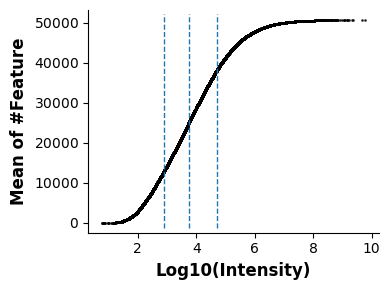

In [4]:
pa_intensities = np.array([int(f['peak_area']) for f in list_features])
sum_intensities = np.array(study_df.iloc[:, 11:].sum(axis=1))

percent_non_zeros = (study_df != 0).sum(axis=1) / study_df.shape[1]
filtered_df = study_df[percent_non_zeros >= 0.8]

median_intensities = np.array(study_df.iloc[:, 11:].median(axis=1))
mean_intensities = np.array(study_df.iloc[:, 11:].mean(axis=1))
filtered_median_intensities = np.array(filtered_df.iloc[:, 11:].median(axis=1))
filtered_mean_intensities = np.array(filtered_df.iloc[:, 11:].mean(axis=1))



# draw_numf_to_intensity(pa_intensities, if_log=True)
# draw_numf_to_intensity(sum_intensities, if_log=True)
# draw_numf_to_intensity(median_intensities, if_log=True, y_label='Median of #Feature')
draw_numf_to_intensity(mean_intensities, if_log=True, y_label='Mean of #Feature')
# draw_numf_to_intensity(filtered_median_intensities, if_log=True, y_label='Median of #Feature')
# draw_numf_to_intensity(filtered_mean_intensities, if_log=True, y_label='Mean of #Feature')

# draw_numf_to_intensity(np.array(filtered_df.iloc[:, 11:].sum(axis=1)), if_log=True)

In [27]:
filtered_df

,id_number,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,...,H-305+_20200220003718,H-306+_20200220034849,H-307+_20200219224535,H-308+_20200220111531,H-309+_20200219171033,H-310+_20200220031653,H-311+_20200220092347,H-312+_20200220175426,H-313+_20200219165435,H-314+_20200220043643
2,F3,124.9979,346.94,338.56,355.39,0,5125711,0.90,0.99,10466,...,17166,3480,30807,19359,36235,70499,26162,49828,40193,19632
3,F4,124.9979,361.05,355.39,365.89,0,700785,0.59,0.98,1442,...,5783,2980,6819,968,1973,5742,2470,10695,4432,4989
4,F5,124.9979,374.58,365.89,382.57,0,11712742,1.00,0.99,22426,...,92746,32501,123602,47316,94576,128298,77577,171169,98327,65556
5,F6,124.9979,385.98,382.57,396.44,0,2113901,0.69,0.98,4122,...,13837,6027,15962,6374,21339,34161,14032,23992,14013,7236
6,F7,124.9979,431.79,423.20,442.38,0,1943888,0.69,0.99,33,...,15391,2782,11825,2265,20365,24701,17360,24305,15211,10802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50623,F50624,853.5410,459.40,450.17,470.29,20585,8178807,0.74,0.85,92,...,277499,141021,112995,106214,51695,73163,0,77097,97672,91774
50626,F50627,853.5622,521.27,511.00,531.56,20587,340577872,1.00,0.99,17218,...,983799,1880094,1791261,1911501,3075692,3773067,5042459,8087073,3345608,2497370
50632,F50633,872.6797,681.74,672.05,691.32,20825,91143007,0.75,0.93,8,...,486598,607192,673867,777447,1906326,1158026,725846,1408874,1915830,659324
50633,F50634,872.6797,806.70,796.21,817.30,20825,84994897,0.82,0.94,17,...,780016,669300,687336,765107,1463820,978491,65390,1626468,956155,915367
